In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import random
import numpy as np
from heapq import nsmallest
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import mean_squared_error 

/var/folders/2c/db_0lrw50h16d5cqvl89fg3c0000gn/T/ipykernel_7302/2067190028.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


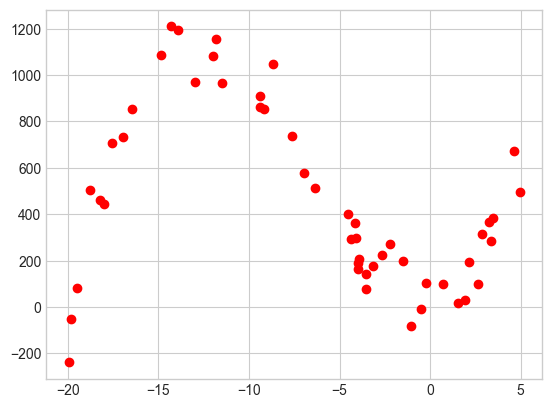

In [5]:
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

In [43]:
def plot_data_and_polynomial(x, y, coefficients, title):
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = np.polyval(coefficients, x_fit)
    
    plt.figure()
    plt.plot(x, y, 'ro', label='Noisy Data')
    plt.plot(x_fit, y_fit, label=title)
    plt.title(title)
    plt.legend()
    plt.show()

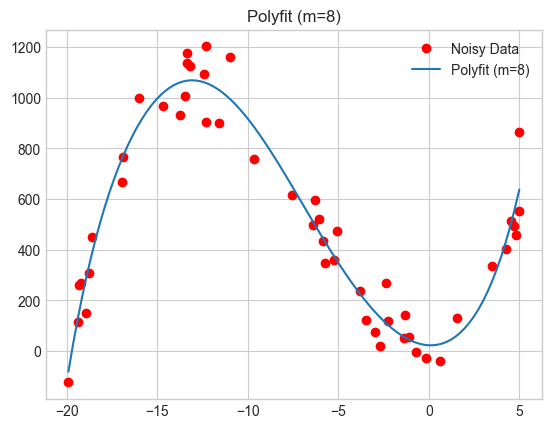

In [44]:
coefficients = np.polyfit(x.flatten(), y.flatten(), 8)
plot_data_and_polynomial(x, y, coefficients, f'Polyfit (m={8})')

In [10]:
coefficients = np.polyfit(x.flatten(), y.flatten(), 8)
y_pred = np.polyval(coefficients, x.flatten())
mse_value = mean_squared_error(y,y_pred)
print(f'The MSE is {mse_value}.')

The MSE is 7518.7856497093335.


#### GA Algorithm

In [38]:
mutation_rate=0.1
crossover_rate=0.5

 The best solution found:                                                                           
 [ 1.07756565 21.36908068  5.79602882 -3.72060757]

 Objective function:
 12726.40764376828


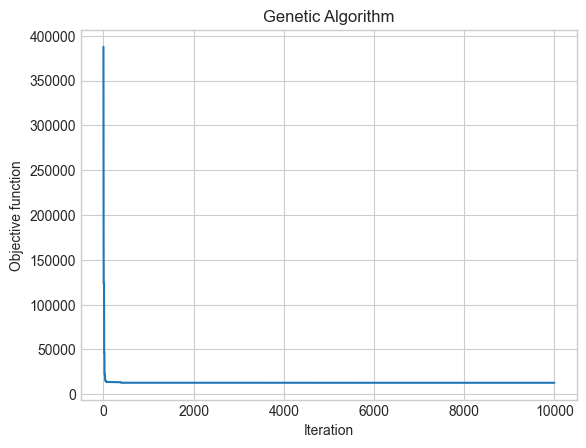

In [55]:
def polynomial_fitness(coeffs):
    poly = np.poly1d(coeffs)
    y_pred = poly(x)
    mse = np.mean((y - y_pred)**2)
    return mse

coeff_bounds = np.array([[-30,30]] * 4)

algorithm_param = {'max_num_iteration': 10000,\
                   'population_size':150,\
                   'mutation_probability':mutation_rate,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': crossover_rate,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model = ga(function=polynomial_fitness, dimension=4, variable_type='real', variable_boundaries=coeff_bounds, algorithm_parameters=algorithm_param)
model.run()

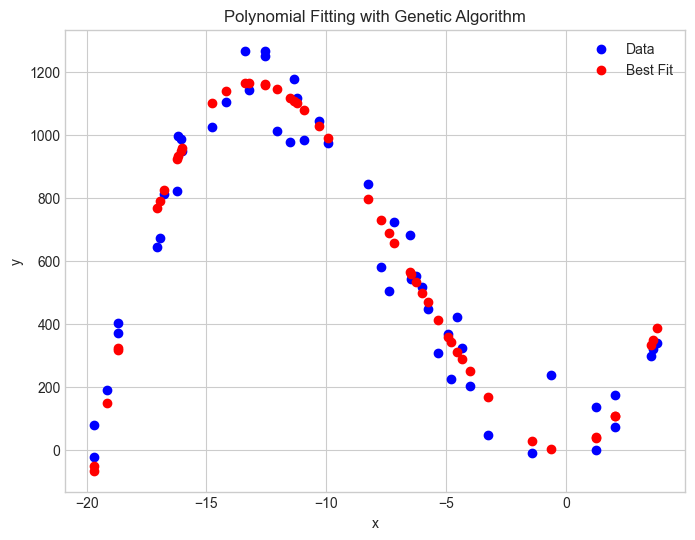

In [56]:
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)

res = model.best_variable
fit=np.poly1d(res)
y_pred_ga = fit(x)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.scatter(x, y_pred_ga, color='red', label='Best Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fitting with Genetic Algorithm')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
mse_best_fit = np.mean((y - y_pred_ga) ** 2)
print("Mean Squared Error of the GA Model:", mse_best_fit)
print("Mean Squared Error of the Polyfit Model:", mse_value)

Mean Squared Error of the GA Model: 7596.145220690553
Mean Squared Error of the Polyfit Model: 7518.7856497093335


#### Results
Judging by both models, we see that the GA model has a slightly worse MSE versus the original polynomial model

Mean Squared Error of the GA Model: 7596.145220690553  
Mean Squared Error of the Polyfit Model: 7518.7856497093335
